# Name: Edem Doe Honu
##   CFD Code Solver Using Python

The code below  solves the simplified one dimensional heat conduction equation (Energy eqaution) for a thin plate of lenth 1 m:
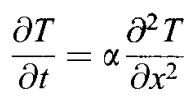

In [28]:
# Importing Valuable Libraries

import numpy as np
import matplotlib.pyplot as plt

In [29]:
# Input block

L = 1 # Length of thin plate
imax = 5 # maximum number of nodes
F = 0.4 # fourier's number < 0.5
iter_max = 40 # maximum number of iterations
h = L / (imax - 1) # Distance between sucessive nodes
T_2 = np.zeros(iter_max)# Initializing Temperature iterations at node 1
T_3 = np.zeros(iter_max)# Initializing Temperature iterations at node 2
T_4 = np.zeros(iter_max)# Initializing Temperature iterations at node 3

In [30]:
# Discretizing the domain
x = np.zeros(imax)
for i in range(imax):
    x[i] = (i - 1) * h

In [31]:
#Verifying domain discretization
x

array([-0.25,  0.  ,  0.25,  0.5 ,  0.75])

In [32]:
# Applying initial conditions to the internal nodes
T = np.zeros(imax)
for i in range(1, imax - 1):
    T[i] = 10

In [33]:
# Verifying initial conditions to the internal nodes
T

array([ 0., 10., 10., 10.,  0.])

In [34]:
# Applying boundary conditions to the extreme nodes on the left and right

# Left side of the thin plate:
T[0] = 100

# Right side of the thin plate:
T[imax-1] = 0

In [35]:
#Verifying boundary conditions to the extreme nodes on the left and right
T

array([100.,  10.,  10.,  10.,   0.])

In [36]:
# The main loop/ Iteration Solver

for k in range(iter_max):   # Iteration loop
    Tnew = np.zeros(imax) # Initializing Tnew arrays with zeroes
    for i in range(1, imax - 1):
        Tnew[i] = F * T[i - 1] + (1 - (2 * F)) * T[i] + F * T[i + 1] # Discretized governing eqaution
    T_2[k] = Tnew[1]
    T_3[k] = Tnew[2]
    T_4[k] = Tnew[3]

    # Apply Boundary Cs to Tnew
    Tnew[0] = T[0]
    Tnew[imax - 1] = T[imax - 1]

    # Swap Told and Tnew
    T = Tnew

In [37]:
#Define function to plot graph for temperatures at internal nodes for several iterations

def plot_iter(T):
    x_iterations = np.arange(1, iter_max + 1)
    plt.plot(x_iterations, T, linewidth=2)

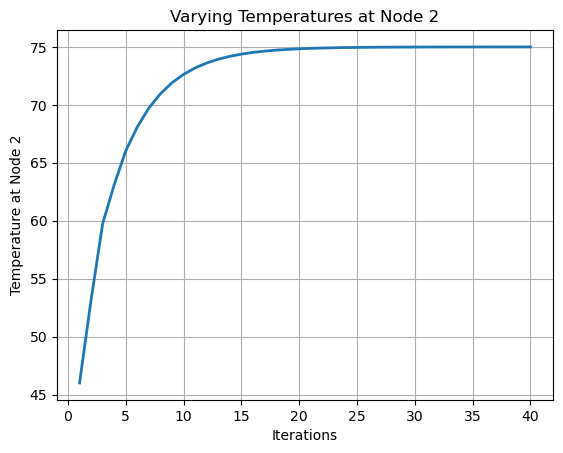

In [38]:
#Graph showing varying temperatures at Node 2

plot_iter(T_2)
plt.ylabel('Temperature at Node 2')
plt.xlabel('Iterations')
plt.title('Varying Temperatures at Node 2')
plt.grid()
plt.show()

### Observation
For varying temperatures at node 2, it can be observed that the temperature values converges at Temperature of 75 after 20 + iterations

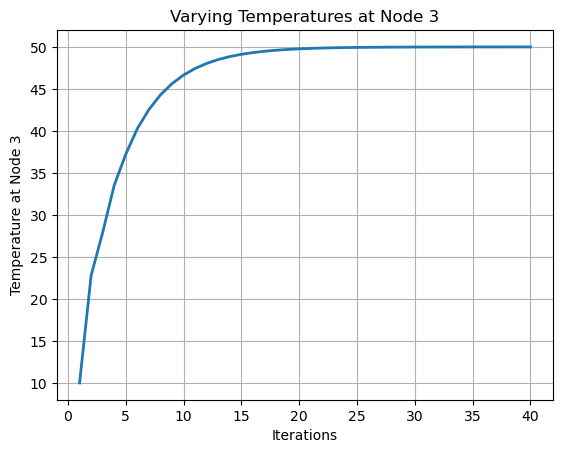

In [39]:
#Graph showing varying temperatures at Node 3
plot_iter(T_3)
plt.ylabel('Temperature at Node 3')
plt.xlabel('Iterations')
plt.title('Varying Temperatures at Node 3')
plt.grid()
plt.show()

### Observation
For varying temperatures at node 3, it can be observed that the temperature values converges at Temperature of 50 after 20 + iterations

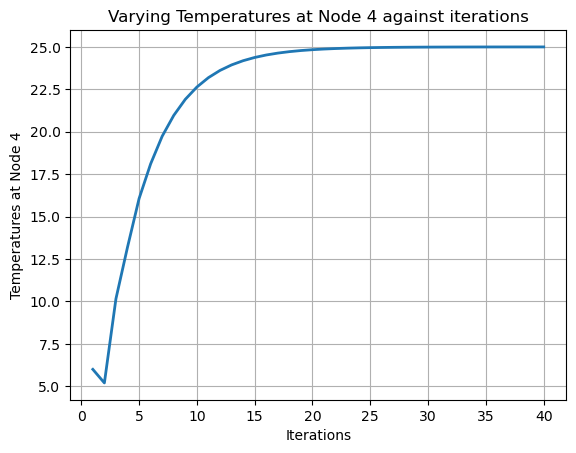

In [40]:
plot_iter(T_4)
plt.ylabel('Temperatures at Node 4')
plt.xlabel('Iterations')
plt.title('Varying Temperatures at Node 4 against iterations')
plt.grid()
plt.show()

### Observation
For varying temperatures at node 4, it can be observed that the temperature values converges at Temperature of 25 after 20 + iterations